In [1]:
# Part 1: A/B Hypothesis testing
# Null Hypothesis = there is no difference between groups A & B
# aClicks/aViews - bClicks/bViews = 0

In [2]:
import scipy as sc
from scipy.stats import norm

In [3]:
aViews = 1000
aClicks = 500

bViews = 1000
bClicks = 550

In [4]:
aProportion = aClicks / aViews
bProportion = bClicks / bViews

aSTD = sc.sqrt(aProportion * (1-aProportion)/aViews)
bSTD = sc.sqrt(bProportion * (1-bProportion)/bViews)

In [5]:
# print(aProportion)
# print(bProportion)
# print(aSTD)
# print(bSTD)

In [6]:
pHat = (aViews*aProportion) / (aViews+bViews) + (bViews*bProportion) / (aViews+bViews)
qHat = 1-pHat

In [7]:
# print(pHat)
# print(qHat)

In [8]:
z = (aProportion - bProportion) / sc.sqrt(pHat*qHat*(1/aViews + 1/bViews))

# not 1-(norm.cfc(z)) because we're checking to see if z value is outlandish (not in the normal distribution)
p = norm.cdf(z)

print(norm.cdf(1))

0.8413447460685429


In [9]:
print("z: ", z)
print("p: ", p)

z:  -2.238868314198227
p:  0.012582242850159199


In [10]:
# The null hypothesis is overturned!  
# The two logos produce different results (we'd expect that logo b is outperforming logo a...)

In [11]:
# Part 2: Regression of real estate data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
importFrame1 = pd.read_csv("realEstate1.csv")
importFrame2 = pd.read_csv("realEstate2.csv")

In [14]:
baseSet = pd.concat([importFrame1, importFrame2])

In [15]:
# print(list(dataset))
reducedColsSet = baseSet[['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']]

filteredSet = reducedColsSet[(reducedColsSet.LstPrice >= 200000) & (reducedColsSet.LstPrice <= 1000000)]
filteredSet = filteredSet[(filteredSet.Longitude < -100) & (filteredSet.Longitude > -120)]
filteredSet = filteredSet[(filteredSet.Taxes < 20000)]

filteredSet['TotSqf'] = pd.to_numeric(filteredSet['TotSqf'].str.replace(',', ''))

propTypeList = [];
for i in filteredSet['PropType']:
    if i == "Single Family":
        propTypeList.append(1);
    else:
        propTypeList.append(0);

filteredSet.insert(len(filteredSet.columns), "Prop_Type_num", propTypeList)

# print(filteredSet)


In [16]:
# There are 260 rows and 16 columns in the dataset.  
# No remaining values seem unreasonable at a glance, though it's possible more will be discovered as I go forward.

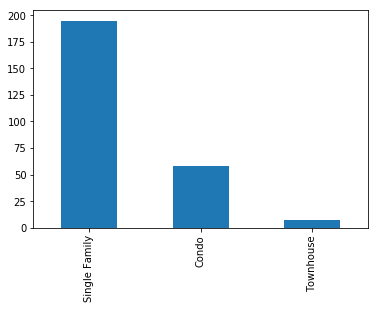

In [17]:
houseTypeSet = filteredSet['PropType'].value_counts().plot.bar()

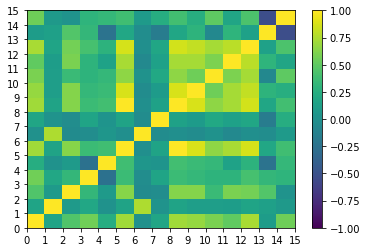

In [41]:
fig, ax = plt.subplots()
im = ax.pcolor(filteredSet.corr(), vmin=-1, vmax=1)
cbar = fig.colorbar(im)

dummy = plt.xticks(np.arange(0, len(filteredSet.columns), 1.0))
dummy = plt.yticks(np.arange(0, len(filteredSet.columns), 1.0))

In [19]:
# houseTypeSet.describe()
# print(houseTypeSet)



# df.groupby([df.index.date, 'action']).count()